<center>
<img src="../../img/ods_stickers.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Nerses Bagiyan](https://www.linkedin.com/in/nersesbagiyan/), [Yulia Klimushina](https://www.linkedin.com/in/yuliya-klimushina-7168a9139), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/).

This material is subject to the terms and conditions of the license [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Free use is permitted for any non-comercial purpose with an obligatory indication of the names of the authors and of the source.

# <center>Topic 4. Linear Classification and Regression
## <center> Part 4. Where Logistic Regression Is Good and Where It's Not

### Analysis of IMDB movie reviews

Now for a little practice! We want to solve the problem of binary classification of IMDB movie reviews. We have a training set with marked reviews, 12500 reviews marked as good, another 12500 bad. Here, it's not easy to get started with machine learning right away because we don't have the matrix $X$; we need to prepare it. We will use a simple approach: bag of words model. Features of the review will be represented by indicators of the presence of each word from the whole corpus in this review. The corpus is the set of all user reviews. The idea is illustrated by a picture

<img src="../../img/bag_of_words.svg" width=80%>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

**To get started, download the dataset [here](http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz) (direct download link). The dataset is briefly described [here](http://ai.stanford.edu/~amaas/data/sentiment/). There are 12.5k of good and bad reviews in the test and training sets.**

In [2]:
# change the path to the file
reviews_train = load_files("C:/Users/Arkajit/Anaconda2/envs/TFENV2/data/aclImdb/train")
text_train, y_train = reviews_train.data, reviews_train.target

In [3]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

Number of documents in training data: 75000
[12500 12500 50000]


In [4]:
# change the path to the file
reviews_test = load_files("C:/Users/Arkajit/Anaconda2/envs/TFENV2/data/aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


**Here are a few examples of the reviews.**

In [5]:
print(text_train[1])

b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some comic scenes, good acting by the lead cast and the baby. Only problem is

In [6]:
y_train[1] # bad review

2

In [7]:
text_train[2]

b'The future, we are told, are what we make of it. Philip K. Dick did not want to take that chance, so he wrote many many many short stories about the future of man and where we, as a society, were headed. Blade Runner, Total Recall, Paycheck, Screamers, and Minority Report are all short stories written by Dick about the future that have been turned into a movie, and most have a less than enthusiastic view of where we are headed. In Minority Report, we see the effects of predicting the future to the point of crimes are prevented by arresting murderers before they kill. If that does not appear logical, there is a quick little scene early in the movie that addresses those concerns, and on the surface makes sense. Tom Cruise plays the Washington, DC pre-crime chief, John Anderton, who runs the investigators who rely on 3 scientifically engineered beings who can see murders before they happen. The system, of course, raises civil liberty issues, but seems to work perfectly, that is until An

In [8]:
y_train[2] # good review

2

## A Simple Count of Words

**First, we will create a dictionary of all the words using CountVectorizer**

In [9]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

124255

**If you look at the examples of "words" (let's call them tokens), you can see that we have omitted many of the important steps in text processing (automatic text processing can itself be a completely separate series of articles).**

In [10]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002', '003', '003830', '004', '005', '006', '007', '0079', '008', '0080', '0083', '009', '0091042', '0093638', '00am', '00o', '00pm', '00s', '01', '015', '019', '01p', '01pm', '02', '020410', '022', '0267', '029', '03', '0312', '039']
['heathen', 'heathens', 'heather', 'heatherbennett', 'heatherly', 'heathers', 'heatherton', 'heathkit', 'heathrow', 'heating', 'heatman', 'heatmiser', 'heaton', 'heats', 'heatseeker', 'heatwave', 'heave', 'heaved', 'heaven', 'heavenlier', 'heavenliness', 'heavenly', 'heavens', 'heavenward', 'heaves', 'heavier', 'heavies', 'heaviest', 'heavily', 'heaviness', 'heaving', 'heavy', 'heavyarms', 'heavyhanded', 'heavys', 'heavyset', 'heavyweight', 'heavyweights', 'heber', 'hebert', 'hebetude', 'hebner', 'hebraic', 'hebrew', 'hebrews', 'hebrides', 'hebro

**Secondly, we are encoding the sentences from the training set texts with the indices of incoming words. We'll use the sparse format.**

In [11]:
X_train = cv.transform(text_train)
X_train

<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10359806 stored elements in Compressed Sparse Row format>

**Let's see how our transformation worked**

In [12]:
print(text_train[19726])

b'When celebrating the cycle-of-life "Cabaret" sits on the spice shelf.<br /><br />A town which is occupied by a sausage-factory which comes to life when the meat-plant workers come in for rest and relaxation and perform the lessons and morality-tales which are learned from safe and unsafe handling of food and objects around different life-forms.<br /><br />That sex, love, and family must sometimes be sacrificed to perform and follow the foot-lights of the stage.<br /><br />War is sometimes a bi-product of military-personal racing to their favourite performance venue(s) where "other" children and wives lived and worked in Europe and especially in Germany.<br /><br />The cycle-of-life is the call for many to chase the memory and contact with those people and places which made them excel at something, namely war.<br /><br />That in the end the only way to keep some of the universe\'s life-forms from racing to a celebration of war as depicted in other films such as "Wood Stock" and "Schin

In [13]:
X_train[19726].nonzero()[1]

array([  5618,   7054,   7369,   7611,   8095,  10438,  10846,  12304,
        14846,  16930,  17043,  17335,  19129,  19130,  19874,  20445,
        22862,  22895,  24215,  24427,  26983,  29377,  29850,  30506,
        30509,  35168,  35960,  36083,  37034,  37373,  37740,  38685,
        38949,  39465,  40411,  41637,  41697,  41728,  41777,  42019,
        42941,  44847,  48974,  54396,  56764,  59788,  63251,  63841,
        64209,  64299,  64681,  64804,  65659,  66706,  67864,  69694,
        70191,  71254,  71442,  72560,  73037,  73563,  74308,  74845,
        77646,  77840,  78010,  78458,  78529,  79267,  79272,  82072,
        82219,  82223,  82444,  83765,  83852,  86367,  88401,  90774,
        91678,  94532,  94621,  95632,  96154,  98076,  98732, 100389,
       102253, 102284, 102290, 102977, 103177, 103986, 104950, 106183,
       108285, 109890, 109916, 109969, 109985, 110367, 111180, 111939,
       115549, 116025, 117589, 119400, 119561, 119773, 120484, 120491,
      

In [14]:
X_train[19726].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]),
 array([  5618,   7054,   7369,   7611,   8095,  10438,  10846,  12304,
         14846,  16930,  17043,  17335,  19129,  19130,  19874,  20445,
         22862,  22895,  24215,  24427,  26983,  29377,  29850,  30506,
         30509,  35168,  35960,  36083,  37034,  37373,  37740,  38685,
         38949,  39465,  40411,  41637,  41697,  41728,  41777,  42019,
         42941,  44847,  48974,  54396,  56764,  59788,  63251,  63841,
         64209,  64299,  64681,  64804,  65659,  66706,  67864,  69694,
         70191,  71254,  71442,  72560,  73037,  73563,  74308,  74845,
         77646

**Third, we will apply the same operations to the test set**

In [15]:
X_test = cv.transform(text_test)

**The next step is to train Logistic Regression.**

In [16]:
%%time
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

C:\Users\Arkajit\Anaconda2\envs\TFENV2\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Wall time: 31min 43s
Parser   : 226 ms


**Let's look at accuracy on the both the training and the test sets.**

In [17]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3),

(0.94999999999999996, 0.20000000000000001)

**The coefficients of the model can be beautifully displayed.**

In [18]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");


In [19]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();
    

IndexError: index 263318 is out of bounds for axis 1 with size 124255

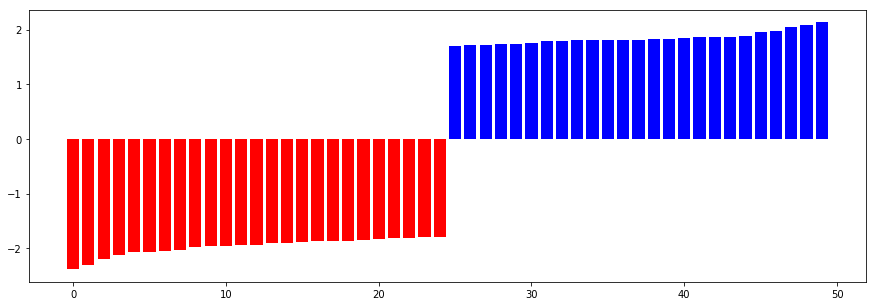

In [20]:
visualize_coefficients(logit, cv.get_feature_names())

**To make our model better, we can optimize the regularization coefficient for the `Logistic Regression`. We'll use `sklearn.pipeline` because `CountVectorizer` should only be applied to the training data (so as to not "peek" into the test set and not count word frequencies there). In this case, `pipeline` determines the correct sequence of actions: apply `CountVectorizer`, then train `Logistic Regression`.**

In [21]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(), 
                                LogisticRegression(n_jobs=-1, random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

C:\Users\Arkajit\Anaconda2\envs\TFENV2\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.20036
Wall time: 19min 50s


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

**Let's print best $C$ and cv-score using this hyperparameter:**

In [ ]:
grid_logit.best_params_, grid_logit.best_score_

In [ ]:
plot_grid_scores(grid_logit, 'logisticregression__C')

For the validation set:

In [ ]:
grid_logit.score(text_test, y_test)

**Now let's do the same with random forest. We see that, with logistic regression, we achieve better accuracy with less effort.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [ ]:
%%time
forest.fit(X_train, y_train)

In [ ]:
round(forest.score(X_test, y_test), 3)

### XOR-Problem
Let's now consider an example where linear models are worse.

Linear classification methods still define a very simple separating surface - a hyperplane. The most famous toy example of where classes cannot be divided by a hyperplane (or line) with no errors is "the XOR problem".

XOR is the "exclusive OR", a Boolean function with the following truth table:



<img src='../../img/XOR_table.gif'>

XOR is the name given to a simple binary classification problem in which the classes are presented as diagonally extended intersecting point clouds.

In [ ]:
# creating dataset
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

Obviously, one cannot draw a single straight line to separate one class from another without errors. Therefore, logistic regression performs poorly with this task.

In [ ]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap='seismic')
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [ ]:
plot_boundary(LogisticRegression(), X, y,
              "Logistic Regression, XOR problem")

But if one were to give polynomial features as an input (here, up to 2 degrees), then the problem is solved.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])

In [ ]:
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")

Here, logistic regression has still produced a hyperplane but in a 6-dimensional feature space $1, x_1, x_2, x_1^2, x_1x_2$ and $x_2^2$. When we project to the original feature space, $x_1, x_2$, the boundary is nonlinear.

In practice, polynomial features do help, but it is computationally inefficient to build them explicitly. SVM with the kernel trick works much faster. In this approach, only the distance between the objects (defined by the kernel function) in a high dimensional space is computed, and there is no need to produce a combinatorially large number of features. 

### Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220) based on this notebook
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323890/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/oTXGQ-_oqvI) on YouTube
- A nice and concise overview of linear models is given in the book [“Deep Learning”](http://www.deeplearningbook.org) (I. Goodfellow, Y. Bengio, and A. Courville).
- Linear models are covered practically in every ML book. We recommend “Pattern Recognition and Machine Learning” (C. Bishop) and “Machine Learning: A Probabilistic Perspective” (K. Murphy).
- If you prefer a thorough overview of linear model from a statistician’s viewpoint, then look at “The elements of statistical learning” (T. Hastie, R. Tibshirani, and J. Friedman).
- The book “Machine Learning in Action” (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Search for linear regression and logistic regression.